In [0]:
#from google.colab import auth
#auth.authenticate_user()

#from google.colab import drive
#drive.mount('/content/gdrive')

import os
os.getcwd()

import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#@title TrainData Preprocessing


In [0]:
df=pd.read_csv("train.csv")

## 1) "Embarked" 대문자화, Null 값은 mode로 fillin
df['Embarked']=df['Embarked'].str.upper()
df.Embarked=df.Embarked.fillna("S")

## 2) convert name
df["NamePrefix"]=df.Name.apply(lambda x: x.split(' ')[1])

NamePrefix_array=[]
for i in df['NamePrefix']:
    if all([i != 'Mr.', i != 'Mrs.' , i != 'Miss.' , i!="Master."]):
        NamePrefix_array.append('rest')
    else: NamePrefix_array.append(i)
df['NamePrefix_Simple']=NamePrefix_array

df=df.drop(["Name", "NamePrefix"], axis=1)

## 3) drop Ticket
df=df.drop(['Ticket'], axis=1)


## 4) "Cabin"
df.Cabin=df.Cabin.fillna('N')
df.Cabin=df.Cabin.apply(lambda x: x[0])

## 5) "Age": Estimate utilizing prefix
## Prefix를 기준으로 그 평균을 삽입
for i in range(len(df)):
  if df['Age'].isnull()[i]==True:
    df['Age'][i]=df["Age"][df["NamePrefix_Simple"]==df["NamePrefix_Simple"][i]].mean()
  else:
    pass
  
  
df.drop(["PassengerId", "Survived"], axis=1)

df.hist(bins=50, figsize=(20,20))

In [0]:
df=pd.read_csv("train.csv")

## 1) "Embarked" 대문자화, Null 값은 mode로 fillin
df['Embarked']=df['Embarked'].str.upper()
df.Embarked=df.Embarked.fillna("S")

## 2) convert name
df["NamePrefix"]=df.Name.apply(lambda x: x.split(' ')[1])

NamePrefix_array=[]
for i in df['NamePrefix']:
    if all([i != 'Mr.', i != 'Mrs.' , i != 'Miss.' , i!="Master."]):
        NamePrefix_array.append('rest')
    else: NamePrefix_array.append(i)
df['NamePrefix_Simple']=NamePrefix_array

df=df.drop(["Name", "NamePrefix"], axis=1)

## 3) drop Ticket
df=df.drop(['Ticket'], axis=1)


## 4) "Cabin"
df.Cabin=df.Cabin.fillna('N')
df.Cabin=df.Cabin.apply(lambda x: x[0])

## 5) "Age": Estimate utilizing prefix
## Prefix를 기준으로 그 평균을 삽입
for i in range(len(df)):
  if df['Age'].isnull()[i]==True:
    df['Age'][i]=df["Age"][df["NamePrefix_Simple"]==df["NamePrefix_Simple"][i]].mean()
  else:
    pass
  

## 6) one hotending: "Sex" "Cabin" "Embarked" "Prefix"
##test set에 Cabin T가 없는 것을 확인하여 one hot encoding 시 T Cabin을 빼기로함
df_onehot1=pd.get_dummies(df[["Sex", "Embarked", "NamePrefix_Simple"]], drop_first=True)
df_onehot2=pd.get_dummies(df["Cabin"],prefix="Cabin", drop_first=False)

df=df.drop(["Cabin", "Sex", "Embarked", "NamePrefix_Simple"], axis=1)
df_onehot2=df_onehot2.drop(["Cabin_T"], axis=1)
df=pd.concat([df, df_onehot1, df_onehot2], axis=1)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,NamePrefix_Simple_Mrs.,NamePrefix_Simple_rest,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Age                        891 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Fare                       891 non-null float64
Sex_male                   891 non-null uint8
Embarked_Q                 891 non-null uint8
Embarked_S                 891 non-null uint8
NamePrefix_Simple_Miss.    891 non-null uint8
NamePrefix_Simple_Mr.      891 non-null uint8
NamePrefix_Simple_Mrs.     891 non-null uint8
NamePrefix_Simple_rest     891 non-null uint8
Cabin_A                    891 non-null uint8
Cabin_B                    891 non-null uint8
Cabin_C                    891 non-null uint8
Cabin_D                    891 non-null uint8
Cabin_E                    891 non-null uint8
Cabin_F          

In [0]:
#@title Test Data Preprocessing


In [0]:
dft=pd.read_csv("test.csv")


## 1) "Embarked" 대문자화, Null 값은 mode로 fill in
dft['Embarked']=dft['Embarked'].str.upper()
dft.Embarked=dft.Embarked.fillna("S")

## 2) convert name
dft["NamePrefix"]=dft.Name.apply(lambda x: x.split(' ')[1])

NamePrefix_array=[]
for i in dft['NamePrefix']:
    if all([i != 'Mr.', i != 'Mrs.' , i != 'Miss.' , i!="Master."]):
        NamePrefix_array.append('rest')
    else: NamePrefix_array.append(i)
dft['NamePrefix_Simple']=NamePrefix_array

dft=dft.drop(["Name", "NamePrefix"], axis=1)

## 3) drop Ticket
dft=dft.drop(['Ticket'], axis=1)


## 4) "Cabin"
dft.Cabin=dft.Cabin.fillna('N')
dft.Cabin=dft.Cabin.apply(lambda x: x[0])

## 5) "Age": Estimate utilizing prefix
## Prefix를 기준으로 그 평균을 삽입
for i in range(len(dft)):
  if dft['Age'].isnull()[i]==True:
    dft['Age'][i]=dft["Age"][dft["NamePrefix_Simple"]==dft["NamePrefix_Simple"][i]].mean()
  else:
    pass
  
  
## 6) "Fare"의 null값을 채워준다
dft.Fare=dft.Fare.fillna(dft.Fare.mean())
  
  
## 7) One-hot encoding
dft_onehot1=pd.get_dummies(dft[["Sex", "Embarked", "NamePrefix_Simple"]], drop_first=True)
dft_onehot2=pd.get_dummies(dft["Cabin"], prefix="Cabin", drop_first=False)

dft=dft.drop(["Cabin", "Sex", "Embarked", "NamePrefix_Simple"], axis=1)
dft=pd.concat([dft, dft_onehot1, dft_onehot2], axis=1)
   
  
dft.info()


 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId                418 non-null int64
Pclass                     418 non-null int64
Age                        418 non-null float64
SibSp                      418 non-null int64
Parch                      418 non-null int64
Fare                       418 non-null float64
Sex_male                   418 non-null uint8
Embarked_Q                 418 non-null uint8
Embarked_S                 418 non-null uint8
NamePrefix_Simple_Miss.    418 non-null uint8
NamePrefix_Simple_Mr.      418 non-null uint8
NamePrefix_Simple_Mrs.     418 non-null uint8
NamePrefix_Simple_rest     418 non-null uint8
Cabin_A                    418 non-null uint8
Cabin_B                    418 non-null uint8
Cabin_C                    418 non-null uint8
Cabin_D                    418 non-null uint8
Cabin_E                    418 non-null uint8
Cabin_F                    418 non-null uint8
Cabin_G          

In [0]:
#@title Data Analysis


In [0]:
#Start DataAnalysis

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,LogisticRegression
from sklearn.linear_model import Perceptron

#model selection
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a00448c18>,
      dtype=object)

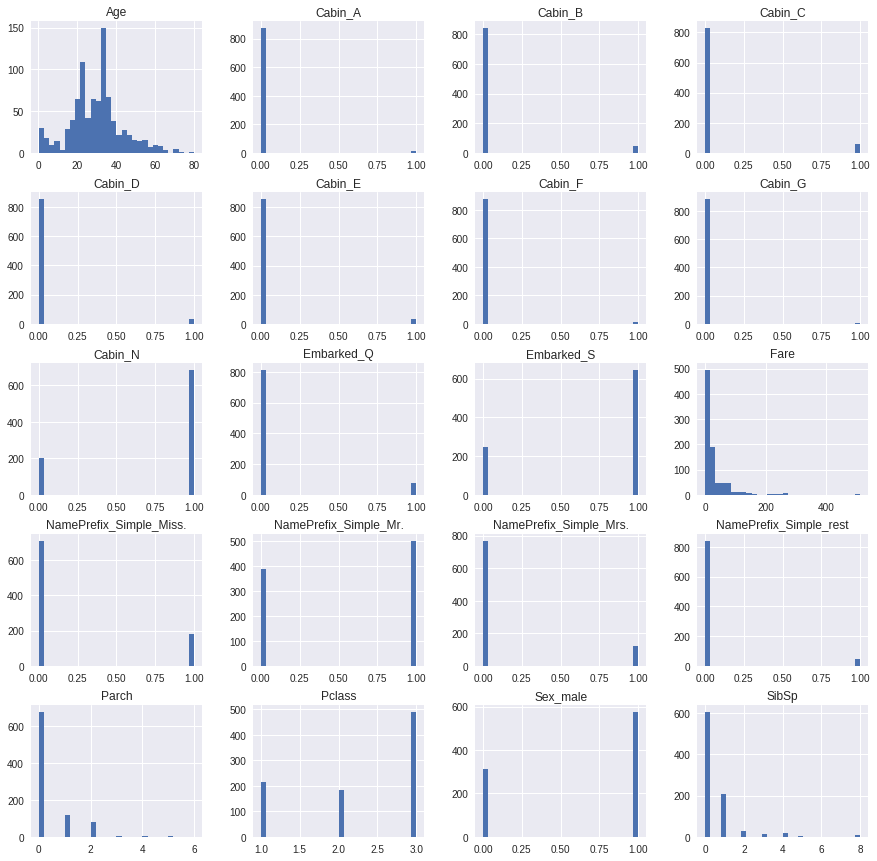

In [0]:
X=df.drop(["Survived", "PassengerId"], axis=1)

X.hist(bins=30, figsize=(15,15))

In [0]:


X=df.drop(["Survived", "PassengerId"], axis=1)
y=df["Survived"]
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=43,
                                                 stratify=y)



##Scaling

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

##Decided to use minmaxscaler becuase most of the features are one-hot encoded

mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)




#print(np.mean(X_train), np.mean(X_test), np.std(X_train), np.std(X_test))


print( "X_train mean:%0.3f" %(np.mean(X_train)))
print( "X_train std:%0.3f" %(np.std(X_train)))
print( "X_test mean:%0.3f" %(np.mean(X_test)))
print( "X_test std:%0.3f" %(np.std(X_test)))




X_train mean:0.231
X_train std:0.398
X_test mean:0.235
X_test std:0.401


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:

# Test.csv data Scaling

Xt=dft.drop(["PassengerId"], axis=1)
Xt=Xt.values
##Scaling

Xt=mms.transform(Xt)

In [0]:
#@title Classification Model


In [0]:
##Classification model

##gridsearch cv 함수 만들기
all_model_name=[]
all_cross_score=[]
all_accuracy_score=[]
all_precision_score=[]

def do_gscv(model, params_dict, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model_name=model.__class__.__name__
    all_model_name.append(model_name)
    model=GridSearchCV(estimator=model,
                 param_grid=params_dict,
                 scoring='accuracy',
                 n_jobs=-1,
                 cv=10)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    ac_score=accuracy_score(y_test, pred)
    all_accuracy_score.append(ac_score)
    print("##"+model_name+"##")
    print('Accuracy:%0.2f' %ac_score)
    print(model.best_params_)
    cv_score=[]
    for i in range(10):
        cv_score.append(model.cv_results_['split'+str(i)+'_test_score'][model.best_index_])
    all_cross_score.append(cv_score)
    
 

In [0]:
##model과 params dict 만들기

all_model=[DecisionTreeClassifier(), 
           RandomForestClassifier(), 
           BaggingClassifier(), 
           KNeighborsClassifier(), 
           AdaBoostClassifier(),
           SVC(),
           Perceptron()]
all_params_dict=[{'criterion': ['gini', 'entropy'],
                  'max_depth': [2,3,4,5,6]},
                {'n_estimators':np.arange(10,30,2), 
                 'criterion': ['gini', 'entropy'], 
                 'max_depth':[2,3,4,5,6]},
                {'n_estimators': np.arange(1,30,5),
                 'max_samples':[0.4, 0.5,0.6,0.7, 0.8]},
                {'n_neighbors': np.arange(1,6,1),
                 'weights':['uniform', 'distance'],
                 'algorithm':['auto','ball_tree', 'brute']},
                {'n_estimators': np.arange(1,30,5)},
                {'C': [0.1, 1.0, 10.0, 50.0,100.0],
                 'kernel':['poly', 'linear', 'rbf']},
                {'penalty':['l1','l2'], 
                 'alpha':[0.0001,0.0005, 0.001, 0.0015, 0.02, 0.05], 
                 'n_iter':[i for i in range(325,375)], 'eta0':[0.1]}]


##함수 실행
for model, params_dict in zip(all_model, all_params_dict):
    do_gscv(model, params_dict)

##DecisionTreeClassifier##
Accuracy:0.84
{'criterion': 'entropy', 'max_depth': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##RandomForestClassifier##
Accuracy:0.84
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 26}
##BaggingClassifier##
Accuracy:0.84
{'max_samples': 0.5, 'n_estimators': 16}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##KNeighborsClassifier##
Accuracy:0.81
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
##AdaBoostClassifier##
Accuracy:0.82
{'n_estimators': 16}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##SVC##
Accuracy:0.84
{'C': 100.0, 'kernel': 'rbf'}
##Perceptron##
Accuracy:0.80
{'alpha': 0.0005, 'eta0': 0.1, 'n_iter': 370, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [0]:
#@title Regression Model


In [0]:
##regression model

##making regression functinon
all_model_name_reg=[]
all_cross_score_reg=[]
all_accuracy_score_reg=[]
all_precision_score_reg=[]

def dogs_reg(model_reg, params_dict_reg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        model_name=model_reg.__class__.__name__
        all_model_name_reg.append(model_name)
        model=GridSearchCV(estimator=model_reg,
                  param_grid=params_dict_reg,
                  n_jobs=-1,
                  cv=10)
        model.fit(X_train, y_train)
        pred_prob=model.predict(X_test)
        fpr,tpr, threshold=roc_curve(y_test, pred_prob)
        roc_result=pd.DataFrame([fpr, tpr, threshold], index=['fpr', 'tpr', 'threshold']).T
        roc_result['best']=(1-roc_result.fpr)+(roc_result.tpr)
        ##finding optimal_threshold
        optimal_threshold=roc_result.threshold[roc_result.best.idxmax()]
        pred=np.where(pred_prob>=optimal_threshold, 1, 0)
        ##making confusion matrix
        ac_score=accuracy_score(y_test, pred)
        all_accuracy_score_reg.append(ac_score)
        pr_score=precision_score(y_test, pred)
        all_precision_score_reg.append(pr_score)
        con=confusion_matrix(y_test, pred)
        print("##"+model_name+"Result##")
        print("Accuracy:%0.2f" %ac_score)
        #print("Precision:%0.2f" %pr_score)
        #print(con)
        print("Optimal Threshold:%0.2f" %optimal_threshold)
        print(model.best_params_)
        cv_score=[]
        for i in range(10):
            cv_score.append(model.cv_results_['split'+str(i)+'_test_score'][model.best_index_])
        all_cross_score_reg.append(cv_score)

In [0]:
##Regression models and parameter dictionary

all_model_reg=[Lasso(),
              Ridge(),
              ElasticNet(),
              LogisticRegression(),
              LinearRegression()]

all_params_dict_reg=[{'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                    {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                    {'max_iter':[1,2], 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]},
                    {"C":[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty':['l1', 'l2']},
                    {}] 



##함수 실행

for model, params_dict in zip(all_model_reg, all_params_dict_reg):
    dogs_reg(model, params_dict)

##LassoResult##
Accuracy:0.84
Optimal Threshold:0.39
{'alpha': 0.001}
##RidgeResult##
Accuracy:0.84
Optimal Threshold:0.58
{'alpha': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


##ElasticNetResult##
Accuracy:0.81
Optimal Threshold:0.23
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 2}
##LogisticRegressionResult##
Accuracy:0.84
Optimal Threshold:1.00
{'C': 10.0, 'penalty': 'l2'}
##LinearRegressionResult##
Accuracy:0.85
Optimal Threshold:0.60
{}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#@title Result


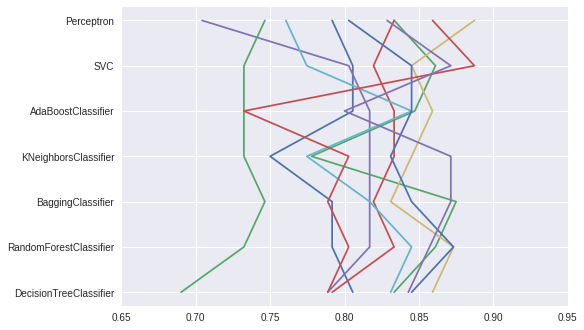

In [0]:
##classification model crossvalidation

compare1=pd.DataFrame(all_cross_score, index=all_model_name)
compare1

for i in range(10):
    plt.plot(compare1[i], compare1.index)
plt.xlim(0.65,0.95)
plt.show()

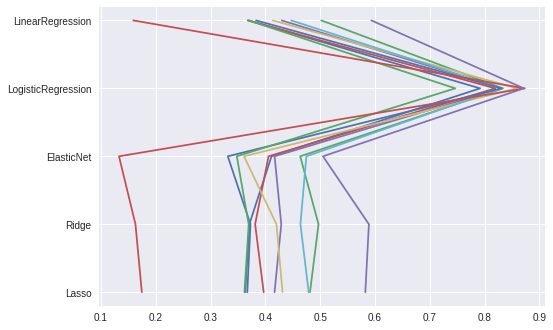

In [0]:
##Regression Model CrossValidation

compare2=pd.DataFrame(all_cross_score_reg, index=all_model_name_reg)
compare2

for i in range(10):
    plt.plot(compare2[i], compare2.index)
plt.xlim()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


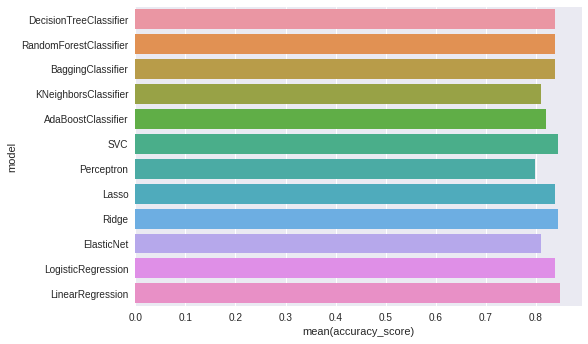

In [0]:
import seaborn as sns

all_model_name_real=all_model_name+all_model_name_reg#+['LinearRegression(PCA)', 'LinearRegression(PLS)']
all_accuracy_score_real=all_accuracy_score+all_accuracy_score_reg#+[0.658906, 0.663848]
 


dfr=pd.DataFrame({'model':all_model_name_real,
                'accuracy_score': all_accuracy_score_real})
               
  
dfr

sns.barplot(x='accuracy_score', y='model', data=dfr)

In [0]:
#@title Prediction 


In [0]:
##determine the Best model and best parameter

##LinearRegressionResult##
#Accuracy:0.85
#Optimal Threshold:0.60


best_model=LinearRegression()
best_model.fit(X_train, y_train)
pred_prob=best_model.predict(Xt)
pred=np.where(pred_prob>=0.60, 1, 0)



In [0]:
pred

#uploaded = files.upload()

In [0]:
a=pd.DataFrame(pred)
a.to_csv("regression.result.csv")

In [0]:
##LogisticRegressionResult##
#Accuracy:0.84
#Optimal Threshold:1.00
#{'C': 10.0, 'penalty': 'l2'}
best_model3=LogisticRegression(C=10.0, penalty="l2")
best_model3.fit(X_train, y_train)
pred_prob3=best_model3.predict(Xt)
pred3=np.where(pred_prob3>=1.00, 1, 0)

c=pd.DataFrame(pred3)
c.to_csv("logicstic.result.csv")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
##RandomForestClassifier##
Accuracy:0.84
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 26}



best_model2=RandomForestClassifier(criterion="gini", max_depth=6, n_estimators=26)
best_model2.fit(X_train, y_train)
pred2=best_model2.predict(Xt)

In [0]:
pred2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
b=pd.DataFrame(pred2)
b.to_csv("randomforest.result.csv")

In [0]:
b

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0
